## Matricule & noms : 
`David-Olivier Roy - xxx`
  
`Amine Melbouci    - xxx`  
  
`Marc-Antoine Huet - xxx`

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 1 </center>
<center>Hiver 2021 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les diff√©rences fondamentales entre Python et Matlab. Ne passez pas forcement par les √©tapes d'installation.
</div>

L‚Äôobjet de ce travail est de mettre en pratique certains des traitements √©l√©mentaires dans le domaine spatial qui ont √©t√© pr√©sent√©s en cours, tout en permettant une familiarisation avec Python et ses outils de traitement d‚Äôimages. Trois points seront abord√©s :
1. Les transformations g√©om√©triques
2. Le d√©bruitage par filtrage dans le domaine spatial
3. L‚Äôam√©lioration d‚Äôimages par manipulation d‚Äôhistogramme et masque flou

Les fonctions et les donn√©es √† utiliser pour effectuer ce travail pratique se trouvent
dans l‚Äôarchive ZIP de ce TP disponible sur le site web du cours. 

**Pond√©ration**
- Transformations g√©om√©triques : 6 pts
- D√©bruitage par filtrage spatial : 6 pts
- Am√©lioration d‚Äôimages : 6 pts
- Qualit√©s de la langue et du rapport : 2 pts
- Total : 20 points

**Date de remise**
- Groupe 1: 14 f√©vrier 23h59
- Groupe 2: 21 f√©vrier 23h59

##  1. Transformations g√©om√©triques (6 pts)

L‚Äôinterpolation est un √©l√©ment central de toute transformation g√©om√©trique d‚Äôimage.
L‚Äôobjet de cette question est de mettre en ≈ìuvre une forme √©l√©mentaire d‚Äôinterpolation et
de l‚Äôutiliser dans une transformation g√©om√©trique particuli√®rement simple : le changement
d‚Äô√©chelle d‚Äôune image √† l‚Äôaide d‚Äôune interpolation par plus proche voisin.
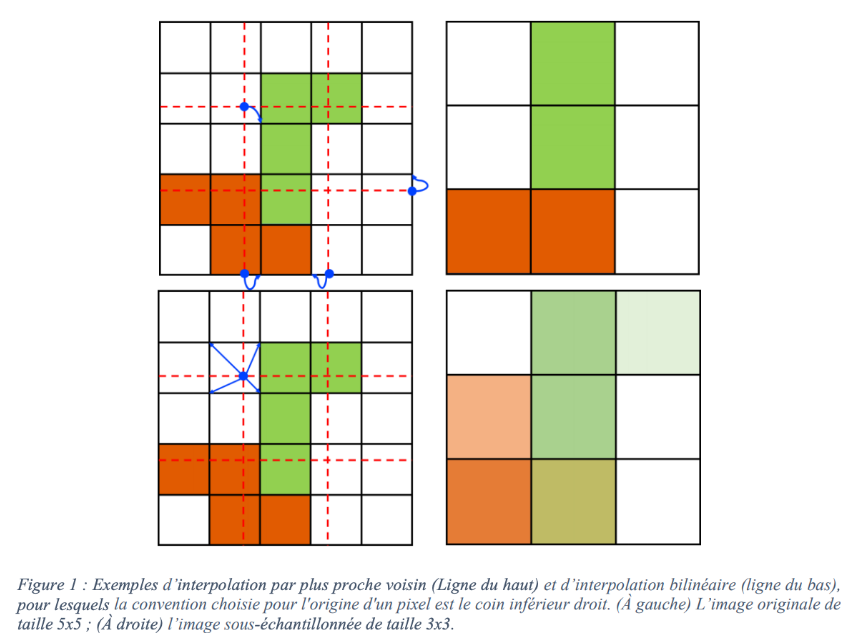

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions ext√©rieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appel√©es ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appel√©s ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
%matplotlib inline
import cv2
import numpy as np
plt.rcParams["figure.figsize"] = (12, 10)


### 1.1. Fonction de changement d‚Äô√©chelle (3 pts)
<div class="alert alert-block alert-warning">
D√©veloppez une fonction d√©finie comme suit. <br>

- Indiquez la mani√®re dont vous d√©finissez les coordonn√©es de l‚Äôorigine de chaque pixel d‚Äôune image (ex : au centre du pixel, dans le coin sup√©rieur gauche ‚Ä¶)

- D√©crivez chacune des √©tapes vous permettant de passer de l‚Äôimage im √† l‚Äôimage ims.

<b>Remarque</b> : Dans la fonction mae_ppv que vous d√©velopperez, vous ne devez pas utiliser
les fonctions d‚Äôinterpolation existantes. Par contre, vous pouvez vous inspirer de la fonction mae_bil.m qui impl√©mente une interpolation bilin√©aire.
    </div>

In [105]:
# Inscrivez votre code ici
# Compl√©ter la fonction suivante faisant de l'interpolation par plus proche voisin.
def mae_ppv(im, sc):
    """ Interpolation par plus proche voisin d'une image im.
    im (nd.array): Image √† interpoler.
    sc (float): Facteur d'√©chelle.
    
    Return:
        nd.array: Image interporl√©e.
    """
    
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    

    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape

    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns
    
    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')
    
    # Extraire les nouvelles coordonn√©es de l'image
    xisp = np.round(xs * M / Ms).astype(int)
    yisp = np.round(ys * N / Ns).astype(int)


    # Interpolation par plus proche voisin
    ims = Ap[xisp, :][:, yisp]
    
    return ims

In [106]:
def mae_bil(im, sc):
    """ Interpolation bilin√©aire d'une image im.
    im (nd.array): Image √† interpoler.
    sc (float): Facteur d'√©chelle.
    
    Return:
        nd.array: Image interporl√©e.
    """
    
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    

    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape

    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns
    
    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')
    
    # Extraire les nouvelles coordonn√©es de l'image
    xisp = np.floor(xs * M / Ms).astype(int)
    yisp = np.floor(ys * N / Ns).astype(int)
    
    [Xsp, Ysp] = np.meshgrid(xsp,ysp)
    Xsp = np.transpose(Xsp)
    Ysp = np.transpose(Ysp)

    Xfsp = Xsp - np.floor(Xsp) # Coefficients pour l'interpolation
    Yfsp = Ysp - np.floor(Ysp)  

    # Interpolation bilin√©aire
    ims = (1 - Xfsp) * (1 - Yfsp) * Ap[xisp, :][:, yisp] + \
          Xfsp * (1-Yfsp) * Ap[xisp + 1, :][:, yisp] + \
          (1 - Xfsp) * Yfsp * Ap[xisp, :][:, yisp + 1] + \
          Xfsp * Yfsp * Ap[xisp + 1, :][:, yisp + 1]
    
    return ims

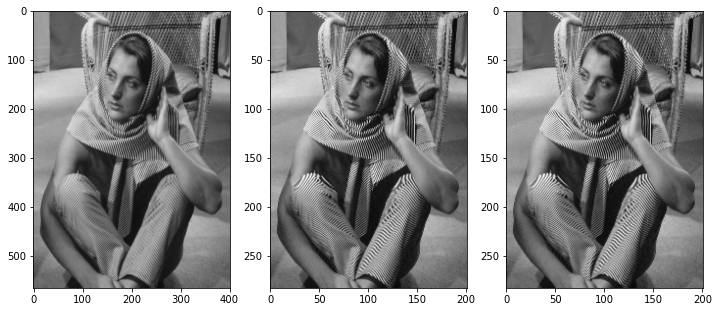

In [107]:
img=plt.imread('Barbara.tif')
#plt.imshow(img, cmap='gray')

imgVoisin=mae_ppv(img, 0.5)
imgBil=mae_bil(img, 0.5)

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(imgVoisin, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(imgBil, cmap='gray')

### 1.2. Effet de l‚Äôinterpolation (3 pts)
<div class="alert alert-block alert-warning">

- Pour mettre en √©vidence l‚Äôeffet de l‚Äôinterpolation, utilisez la fonction que vous avez
d√©velopp√©e pour changer l‚Äô√©chelle de l‚Äôimage Barbara.tif d‚Äôun facteur Œ±
inf√©rieur √† 1. Utilisez ensuite la m√™me fonction et un facteur de 1/ Œ± pour la ramener
l‚Äôimage transform√©e √† son √©chelle initiale.
  </div>

Text(0.5, 1.0, 'Reconstruite')

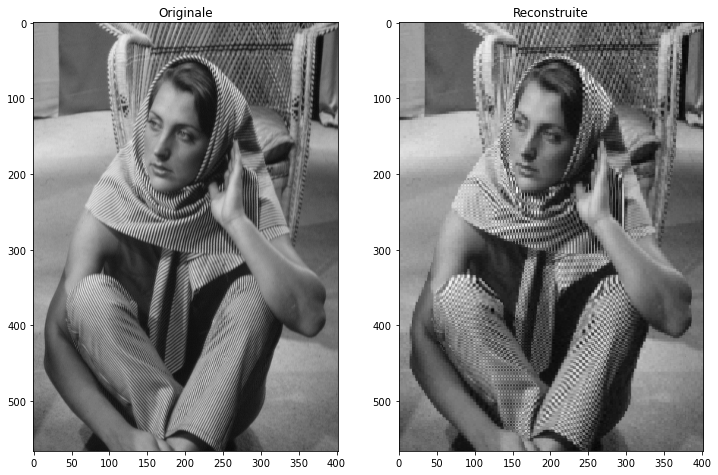

In [108]:
img=plt.imread('Barbara.tif')
alpha = 0.5

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Originale")

imgVoisin1=mae_ppv(img, alpha)

plt.subplot(1,2,2)
imgVoisin=mae_ppv(imgVoisin1, 1/alpha)
plt.imshow(imgVoisin, cmap='gray')
plt.title("Reconstruite")


<div class="alert alert-block alert-warning">


- Effectuez les m√™mes op√©rations avec la fonction mae_bil,
qui utilise une interpolation bilin√©aire.
  </div>

Text(0.5, 1.0, 'Reconstruite')

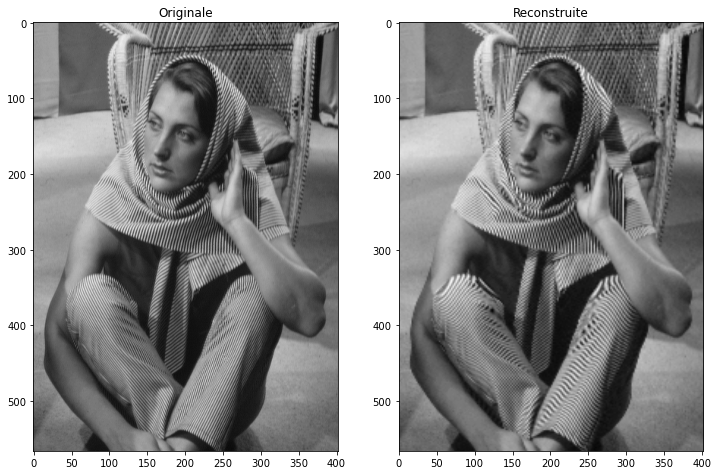

In [109]:
img=plt.imread('Barbara.tif')
alpha = 0.5

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Originale")

imgBil1=mae_bil(img, alpha)

plt.subplot(1,2,2)
imgBil=mae_bil(imgBil1, 1/alpha)
plt.imshow(imgBil, cmap='gray')
plt.title("Reconstruite")


<div class="alert alert-block alert-warning">

- Qu‚Äôobservez-vous ? Est-ce que les deux sch√©mas d‚Äôinterpolation permettent de
reproduire fid√®lement l‚Äôimage originale ? √Ä quoi sont dues les diff√©rences
observ√©es ? Pour r√©pondre √† cette question, vous pouvez calculer l‚Äôerreur
quadratique moyenne entre les images.

\begin{equation*}
\Delta Q = \frac 1 n  \sum_{i,j}\left( I \left( i,j \right) - I' \left( i,j \right) \right)^2
\end{equation*}


O√π n est le nombre de pixel dans l‚Äôimage, ùêº(ùëñ,ùëó) est un pixel de l‚Äôimage original et
ùêº‚Äô(ùëñ,ùëó) est le pixel correspondant dans l‚Äôimage transform√©e. Vous pouvez aussi
observer l‚Äôhistogramme des diff√©rences d‚Äôintensit√© entre les images.

 </div>


In [116]:
x, y = imgVoisin.shape
n = x*y  # Nb de pixels
print("Nombre de pixels: ", n)
print("\n")
print("Erreur quadratique moyenne")

Qvoisin = (1/n)*(np.sum((img.astype("float")-imgVoisin.astype("float"))**2))
print("Plus proche voisin: %.2f" % Qvoisin)

Qbil = (1/n)*(np.sum((img.astype("float")-imgBil.astype("float"))**2))
print("Bilin√©aire: %.2f" % Qbil)


Nombre de pixels:  227532


Erreur quadratique moyenne
Plus proche voisin: 450.27
Bilin√©aire: 258.88


<div class="alert alert-block alert-success"> 
√âvidement, l'interpolation par plus proche voisin apporte une plus grande erreur quadratique moyenne entre l'image originale et celle transform√©e que l'interpolation bilin√©aire. Leur mesures sont respectivement 450,26 et 258,88 pour un facteur Œ± de 0,5. L'interpolation par plus proche voisin donne une image qui semble √™tre beaucoup moins nette comparativement √† son homologue. En r√©duisant la taille de l'image, une partie de l'information a √©t√© perdu. Or, en essayant de reproduire l'image originale, certains art√©facts viennent r√©duire la qualit√© de cette reconstruction.

<div class="alert alert-block alert-warning">
- Quels artefacts (d√©fauts) observez-vous dans les images r√©duites et reconstruites ?
    </div>

<div class="alert alert-block alert-success"> 
L'interpolation par plus proche voisin donne une image moins lisse. Son image reconstruite semble pixelis√©.
  
L'interpolation bilin√©aire donne une image plus floue.



## 2. D√©bruitage par filtrage spatial (6 pts)
<div class="alert alert-block alert-warning">


Le fichier IRM_genou.tif de l‚Äôarchive TP1.zip contient l‚Äôimage d‚Äôun genou obtenue
en imagerie par r√©sonance magn√©tique nucl√©aire (IRM). Cette image est d√©grad√©e par un
bruit relativement important. Le but de cette question est de mettre en ≈ìuvre et de comparer
plusieurs filtres spatiaux, lin√©aires ou non. D√©veloppez et mettez en ≈ìuvre les filtres
suivants :

- Moyennage simple sur un masque carr√© de c√¥t√© 3, 5 ou 7 pixels.
- Moyennage pond√©r√© de type gaussien sur un masque carr√© de c√¥t√© 3, 5 ou 7 pixels.
- Filtrage m√©dian sur un masque carr√© de c√¥t√© 3, 5 ou 7 pixels.

La librairie OpenCV vous permet d'appliquer ces filtres (voir [documentation](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)). L‚Äôimage filtr√©e doit √™tre de m√™me type et avoir la m√™me taille que l‚Äôimage de d√©part.
Comparez empiriquement les r√©sultats, en vous basant notamment sur le bruit r√©siduel, sur
la nettet√© des contours des images filtr√©es et sur l‚Äôerreur quadratique moyenne. Vous
pouvez au besoin vous appuyer sur leur histogramme. Le bruit r√©siduel Œü(ùë•, ùë¶) peut √™tre
calcul√© en soustrayant l‚Äôimage filtr√©e ùêº‚Ä≤(ùë•, ùë¶) √† l‚Äôimage originale ùêº(ùë•, ùë¶).

\begin{equation*}
Œü(ùë•, ùë¶) = |ùêº(ùë•, ùë¶) ‚àí ùêº‚Ä≤(ùë•, ùë¶)|
\end{equation*}


Discutez de l‚Äôeffet du type de filtre (moyenne simple, moyenne pond√©r√©e, m√©dian) et de la
taille du filtre (3, 5, ou 7 pixels) sur les r√©sultats de d√©bruitage. 
    </div>

In [8]:
# Importer l'image
img = cv2.imread('IRM_genou.tif')

# Filtres
cote = 3
simple = cv2.blur(img,(cote,cote))
gaus = cv2.GaussianBlur(img,(cote,cote),0)
median = cv2.medianBlur(img,cote)

(([], []), ([], []))

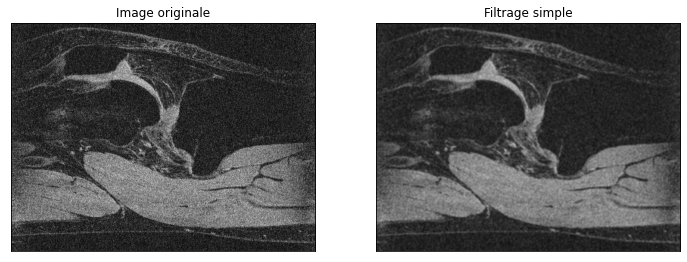

In [9]:
# Filtrage simple
plt.subplot(221), plt.imshow(img), plt.title('Image originale')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(simple),plt.title('Filtrage simple')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

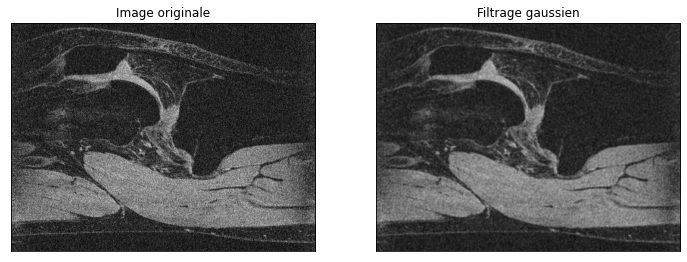

In [10]:
plt.subplot(221),plt.imshow(img),plt.title('Image originale')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(gaus),plt.title('Filtrage gaussien')
plt.xticks([]), plt.yticks([])

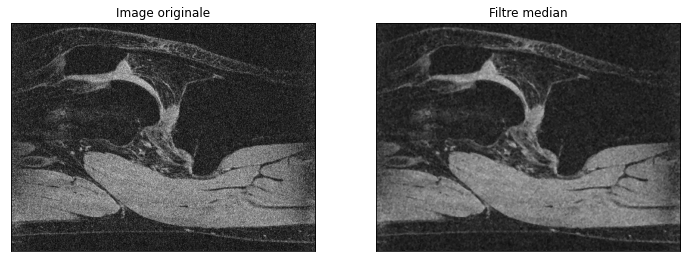

In [11]:
plt.subplot(221),plt.imshow(img),plt.title('Image originale')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(median),plt.title('Filtre median')
plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
# Comparatif

# Bruit r√©siduel
print("Bruit r√©siduel")
Osimp = np.sum(abs(img-simple))
print("simple:   ", Osimp)

Ogaus = np.sum(abs(img-gaus))
print("gaussien: ", Ogaus)

Omedian = np.sum(abs(img-median))
print("median:   ", Omedian)
print('\n')


# Erreur quadratique moyenne
n = float(img.shape[0]*img.shape[1])
print("Erreur quadratique moyenne")
Qsimp = (1/n)*(np.sum((img.astype("float")-simple.astype("float"))**2))
print("simple:   %.1f" % Qsimp)

Qgaus = (1/n)*(np.sum((img.astype("float")-gaus.astype("float"))**2))
print("gaussien:  %.1f" % Qgaus)

Qmedian = (1/n)*(np.sum((img.astype("float")-median.astype("float"))**2))
print("median:   %.1f" % Qmedian)


Bruit r√©siduel
simple:    77257746
gaussien:  77039472
median:    65303664


Erreur quadratique moyenne
simple:   1072.3
gaussien:  742.5
median:   1117.5


<div class="alert alert-block alert-success"> 
Plus la taille du filtre est grande, plus l'image filtr√©e est floue, car le calcul est fait sur un plus grand voisinage de pixels. Plus l'image est floue et plus le bruit diminuera, ce qui correspond √† un haut bruit r√©siduel et une grande erreur quadratique moyenne. Donc, plus la taille du filtre augmente, plus ces 2 m√©triques augmentent. Le filtrage simple est celui produisant les contours les plus flous, puisque c'est une simple moyenne. Le filtre gaussien et m√©dian donnent un r√©sultat visuel assez semblable. Par contre, on voit que l'erreur quadratique moyenne du filtre gaussien est toujours la plus faible des 3, ce qui signifie probablement que beaucoup de pixels bruit√©s sont remplac√©s par des pixels d'une valeur l√©g√®rement plus √©lev√©e ou plus faible. Pour les 2 autres filtres, l'√©cart de correction est probablement plus grand.

## 3. Am√©lioration d‚Äôimages (6 pts)

Le fichier Lune.tif contient une image de la lune de qualit√© m√©diocre, tant du point de
vue de la distribution des niveaux de gris que de la nettet√©. Le but de cette question est
donc d‚Äôappliquer une succession de traitements pour am√©liorer la qualit√© de cette image.

### 3.1. Transformations portant sur l‚Äôintensit√© (2 pts)
<div class="alert alert-block alert-warning">

En vous basant sur l‚Äôhistogramme, effectuez une ou plusieurs transformations portant sur
l‚Äôintensit√© de l‚Äôimage pour en am√©liorer le contraste et l‚Äôaspect visuel. Quelques
transformations que vous pouvez essayer pour am√©liorer le contraste sont :

| Transformation | Param√®tre(s) | √âquation |
| --- | --- | --- |
| Inversion | NA | 1 ‚Äì ùëü |
|Gamma |   ùõæ < 1 si sous-expos√© <br/> ùõæ > 1 si surexpos√© | ùëü<sup>ùõæ</sup> |
| Logarithme | NA | ln(1 + ùëü) /ln(2) |
| Exponentielle | NA | ùëí<sup>ùëüùëôùëõ(2)</sup> ‚àí 1|

<center> ** r correspond √† la valeur d‚Äôun pixel dans l‚Äôimage </center>

<b>Note</b> : Il n‚Äôest pas conseill√© de proc√©der √† l‚Äô√©galisation de l‚Äôhistogramme √† cette √©tape-ci.
Expliquez votre choix de transformation que vous avez utilis√© pour am√©liorer l‚Äôaspect
visuel de l‚Äôimage.

</div>

In [94]:
imageOrig = cv2.imread("Lune.tif", cv2.IMREAD_GRAYSCALE)
imageOrig = imageOrig/255.0

# Graphiques des effets individuels
def plotGraphsHist(image1=None, image2=None, figsize=(12,10)):
    image1 = (image1*255).astype("uint8")
    image2 = (image2*255).astype("uint8")
    figure, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    axs[0,0].imshow(image1, cmap="gray", vmin=0, vmax=255)
    axs[0,0].set_title("Image originale")
    axs[0,1].imshow(image2, cmap="gray", vmin=0, vmax=255)
    axs[0,1].set_title("Image transform√©e")
    axs[1,0].hist(image1.ravel(),256,[0,256])
    axs[1,0].set_title("Histogramme image originale")
    axs[1,0].set_ylim([0,10000])
    axs[1,1].hist(image2.ravel(),256,[0,256])
    axs[1,1].set_title("Histogramme image transform√©e")
    axs[1,1].set_ylim([0,10000])
    axs[0,0].get_xaxis().set_visible(False)
    axs[0,0].get_yaxis().set_visible(False)
    axs[0,1].get_xaxis().set_visible(False)
    axs[0,1].get_yaxis().set_visible(False)
    
def plotGraphs(image1=None, image2=None):
    image1 = (image1*255).astype("uint8")
    image2 = (image2*255).astype("uint8")
    figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,10))
    ax1.imshow(image1, cmap="gray", vmin=0, vmax=255)
    ax1.set_title("Image originale")
    ax2.imshow(image2, cmap="gray", vmin=0, vmax=255)
    ax2.set_title("Image transform√©e")
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    
def inversionOp(image):
    return 1-image

def gammaOp(image, gamma):
    return image ** gamma

def logarithmeOp(image):
    return np.log(1+image)/np.log(2)

def exponentielleOp(image):
    return np.exp(image * np.log(2)) - 1

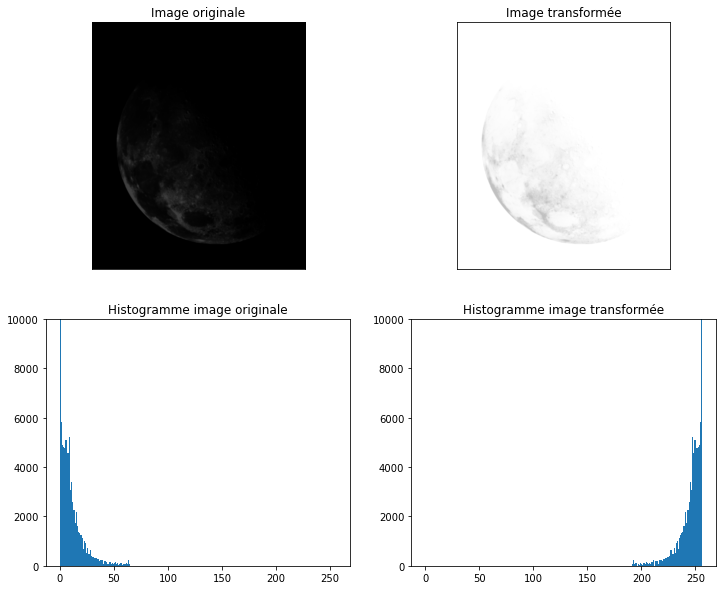

In [82]:
# Inversion
plotGraphsHist(imageOrig, inversionOp(imageOrig))

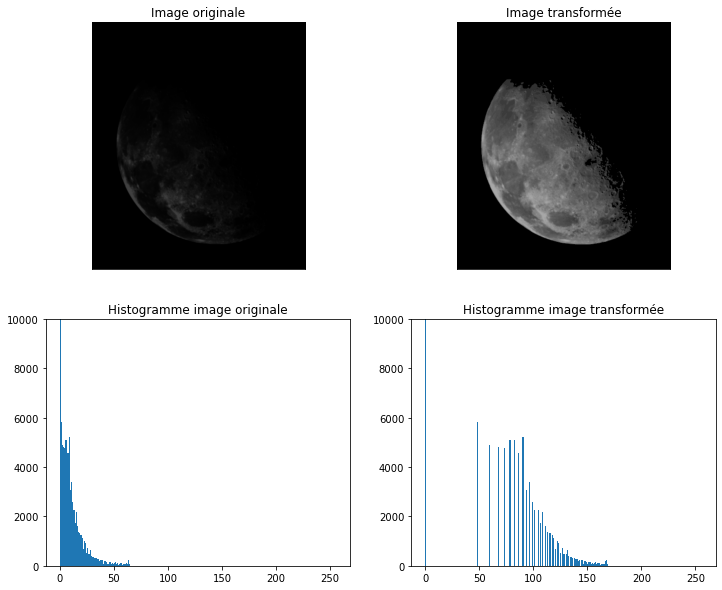

In [83]:
# Gamma
plotGraphsHist(imageOrig, gammaOp(imageOrig, 0.3))

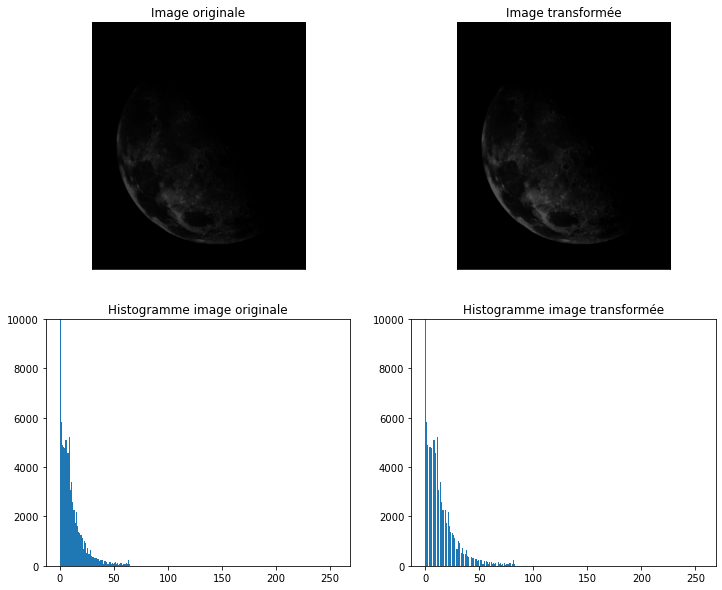

In [84]:
# Logarithme
plotGraphsHist(imageOrig, logarithmeOp(imageOrig))

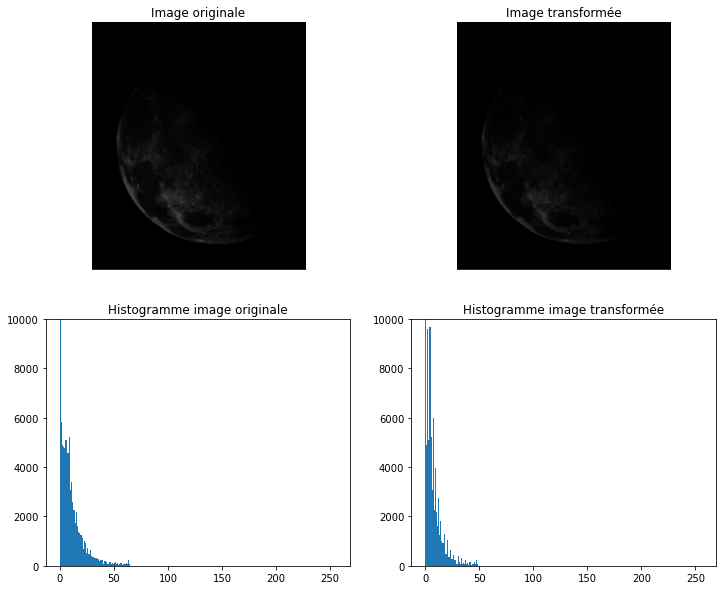

In [85]:
# Exponentielle
plotGraphsHist(imageOrig, exponentielleOp(imageOrig))

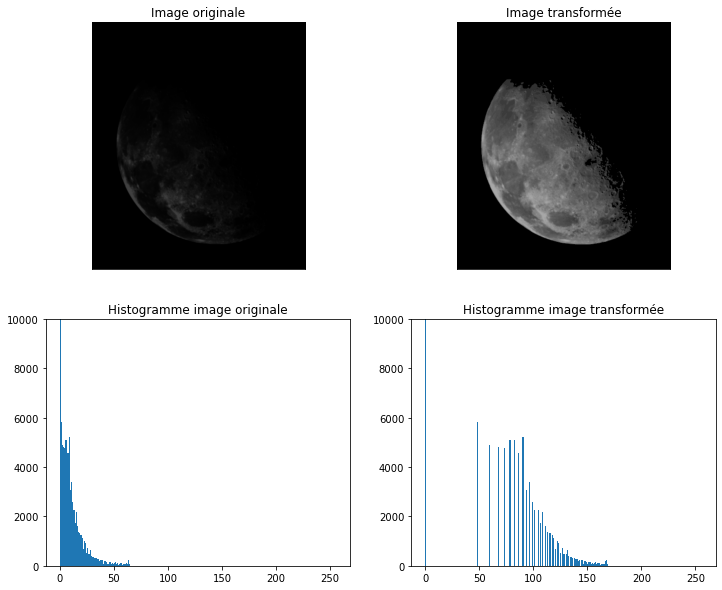

In [86]:
# Transformation globale #1
imageFin = gammaOp(imageOrig, 0.3)
imagePart1 = imageFin
plotGraphsHist(imageOrig, imageFin)

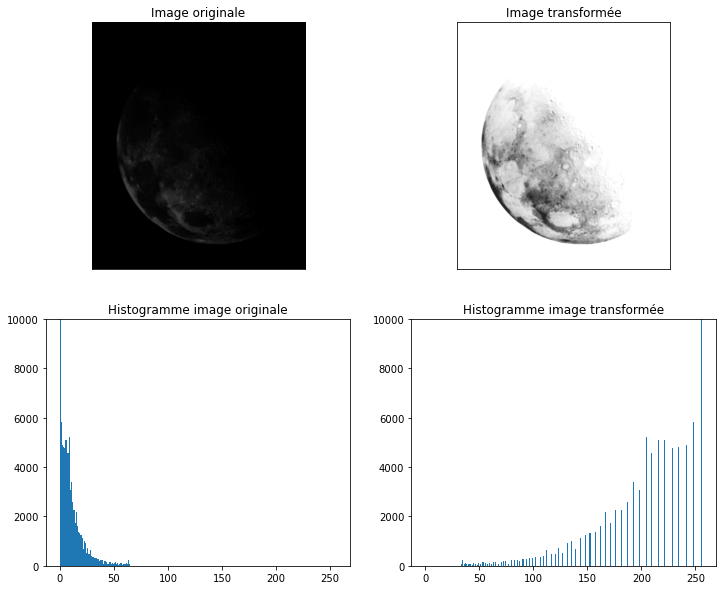

In [87]:
# Transformation globale #2
imageFin = inversionOp(imageOrig)
imageFin = gammaOp(imageFin, 7)
plotGraphsHist(imageOrig, imageFin)

<div class="alert alert-block alert-success"> 
On a test√© des combinaisons des diff√©rentes transformations, mais une simple transformation gamma semble donner un tr√®s bon r√©sultat avec une valeur de gamma de 0.3. Une autre transformation qui donne un tr√®s bon contraste est une inversion suivie d'une transformation gamma (gamma = 7). Toutefois, cette transformation fait perdre l'aspect visuel original de l'image. C'est donc la premi√®re transformation qui a √©t√© conserv√©e pour la suite.

### 3.2. Affinage de l‚Äôimage (2 pts)
<div class="alert alert-block alert-warning">


Appliquez √† l‚Äôimage obtenue √† la question pr√©c√©dente un rehaussement par masquage flou
g√©n√©ralis√© (Unsharp Filter / Masking en anglais). Ce filtre de convolution est d√©fini par

<center> ùê∫ = ùêπ + ùëé [ ùêπ ‚àí ‚Ñé<sub>ùëè</sub> ‚àó ùêπ ] = ùêπ + ùëé [ ùêπ ‚àí ùêπ‚Ä≤ ] </center>

o√π F est l‚Äôimage originale, G est l‚Äôimage rehauss√©e, hb est un noyau de convolution agissant
comme un filtre passe-bas, * est un produit de convolution, a est le coefficient de
rehaussement et b contr√¥le la taille du filtre adoucisseur. Utilisez le filtre par moyennage
pond√©r√© de type Gaussien d√©velopp√© √† la question pr√©c√©dente pour calculer l‚Äôimage floue
ùêπ‚Ä≤ = ‚Ñé<sub>ùëè</sub> ‚àó ùêπ.

Faites varier la taille du filtre adoucisseur et le coefficient de rehaussement. Qu‚Äôobservezvous ? D√©crivez l‚Äôeffet de ces param√®tres sur l‚Äôimage rehauss√©e.
</div>

In [96]:
def affinage(a, filter_size):
    imageFloue = cv2.GaussianBlur(imagePart1, ksize=filter_size, sigmaX=0).squeeze()
    image = imagePart1 + a * (imagePart1 - imageFloue)

    image[image<0] = 0.0   # Clip valeurs <0 √† 0.0
    imagePart2 = image
    plotGraphs(imagePart1, imagePart2)

    # Graphs optionnels pour visualiser
    if True:
        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 10))
        ax1.imshow(imageFloue, cmap="gray", vmin=0, vmax=1)
        ax1.set_title("Image floue")
        ax2.imshow(a*(imagePart1 - imageFloue), cmap="gray", vmin=0, vmax=1)
        ax2.set_title("Masque des contours")
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)
        
    return imagePart2

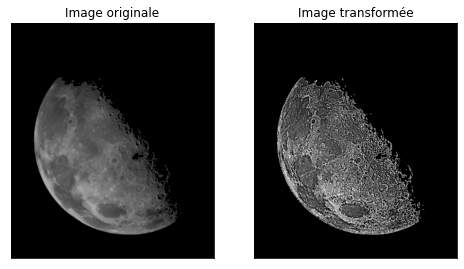

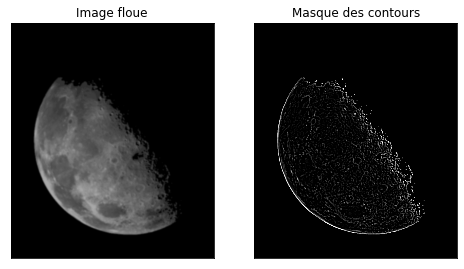

In [97]:
# Valeur de "a" trop grande
image = affinage(20, (5,5))

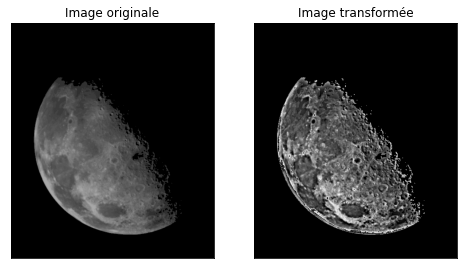

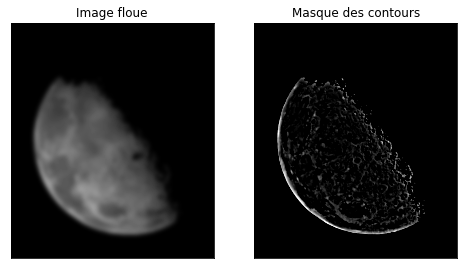

In [98]:
# Taille du filtre trop grande
image = affinage(4, (31,31))

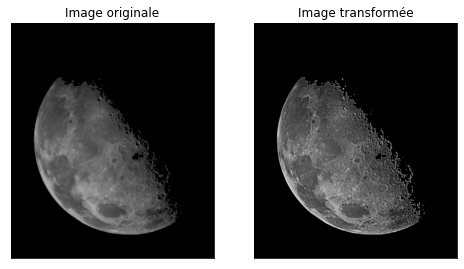

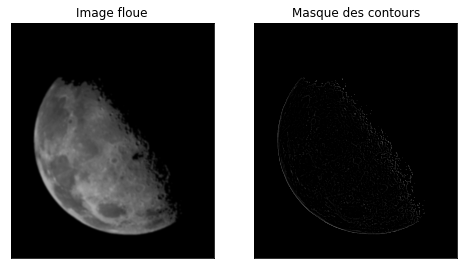

In [99]:
# Transformation
imagePart2 = affinage(3, (7,7))

<div class="alert alert-block alert-success"> 
L'op√©ration de soustraction entre l'image originale et l'image floue cr√©e un masque des contours. Le param√®tre "a" repr√©sente donc √† quel point on additionne une valeur √©lev√©e de contour √† l'image originale. Plus on augmente "a", plus les contours ont une intensit√©, et donc un contraste, √©lev√©s. Par contre, si "a" est trop √©lev√©, on amplifie √©galement ce qui se trouve juste √† c√¥t√© des contours, ce qui √©largie les contours. De plus, une trop grande valeur de "a" peut rendre les contours trop lumineux et ainsi affecter l'aspect visuel de l'image. Lorsqu'on augmente la taille du filtre, on augmente le nombre de pixels pris en compte dans le calcul de l'image floue, ce qui augmente l'adoucissement des contours dans l'image floue. Si l'image floue est trop floue, on perd le rehaussement des contours du masque. Ainsi, l'image transform√©e aura contours rehauss√©s, mais beaucoup trop impr√©cis et √©largis. On a choisit un coefficient de rehaussement de 3 et un filtre de taille (7,7).
 

### 3.3. √âgalisation d‚Äôhistogramme (2 pts)
<div class="alert alert-block alert-warning">


Appliquez une √©galisation d‚Äôhistogramme √† une image visuellement satisfaisante obtenue
√† la question pr√©c√©dente. Qu‚Äôobservez-vous ? Expliquez. Comparez au r√©sultat obtenu si
vous appliquez l‚Äô√©galisation d‚Äôhistogramme √† l‚Äôimage de la Lune originale sans transformer
son intensit√© et sans la rehausser par masquage flou. Pourquoi les r√©sultats sont-ils
diff√©rents ?
     Vous pouvez utiliser la fonction <code>equalize_histogram(img)</code> et <code>plt.hist</code> de matplotlib.
    
</div>

In [100]:
def equalize_histogram(img):
    # Normaliser l'image de 0 √† 255
    img = ((img - img.min()) / (img.max() - img.min()) * 255).astype('uint8')
    hist, bins = np.histogram(img, 256, [0,256])
    T = np.cumsum(hist) # Somme cumul√©e
    T = (T - T.min()) / (T.max() - T.min()) # Normalisation entre 0 et 1
    return T[img]


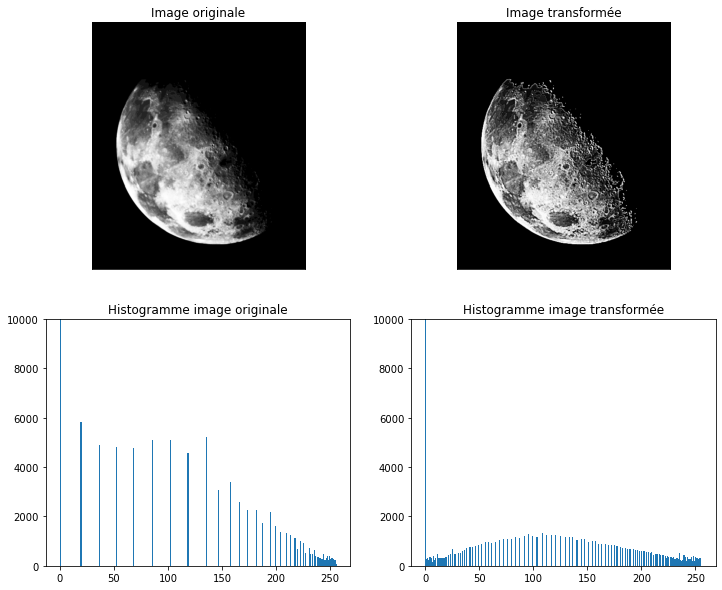

In [101]:
imageOrigEq = equalize_histogram(imageOrig)
imagePart3 = equalize_histogram(imagePart2)

plotGraphsHist(imageOrigEq, imagePart3)

<div class="alert alert-block alert-success"> 
On remarque que l'image originale √©galis√©e est beaucoup plus floue. L'image transform√©e est beaucoup mieux d√©finie. On voit clairement les d√©tails et le contraste est bon. Si on compare les 2 histogrammes, on voit que l'histogramme de l'image transform√©e est tr√®s plat et tr√®s bien distribu√© sur toute la plage d'intensit√©. L'image transform√©e sans √©galisation avait tr√®s peu de pixels de haute intensit√©. L'√©galisation tire profit de toute la plage dynamique. Dans le cas de l'image originale √©galis√©e, la distribution sur la plage d'intensit√© est bien moins uniforme et le nombre de pixels par bin n'est √©galement pas tr√®s uniforme. Par contre, on perd l'aspect visuel de l'image originale dans les 2 cas parce que l'image est beaucoup trop lumineuse. Les r√©sultats des deux histogrammes sont diff√©rents parce que l'algorithme d'√©galisation est fortement d√©pendant de la distribution initiale.